# Predicting House Price using Machine Learning 

In this notebook We will try and predict the price of a House using a data set from kaggle 

## Features :

1. SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
2. MSSubClass: The building class
3.  MSZoning: The general zoning classification
4.  LotFrontage: Linear feet of street connected to property
5. LotArea: Lot size in square feet
6. Street: Type of road access
7.  Alley: Type of alley access
8.  LotShape: General shape of property
9.   LandContour: Flatness of the property
10.    Utilities: Type of utilities available
11.    LotConfig: Lot configuration
12.   LandSlope: Slope of property
13.    Neighborhood: Physical locations within Ames city limits
14.    Condition1: Proximity to main road or railroad
15.    Condition2: Proximity to main road or railroad (if a second is present)
16.    BldgType: Type of dwelling
17.    HouseStyle: Style of dwelling
18.    OverallQual: Overall material and finish quality
19.    OverallCond: Overall condition rating
20.    YearBuilt: Original construction date
21.    YearRemodAdd: Remodel date
22.    RoofStyle: Type of roof
23.    RoofMatl: Roof material
24.    Exterior1st: Exterior covering on house
25.    Exterior2nd: Exterior covering on house (if more than one material)
26.    MasVnrType: Masonry veneer type
27.    MasVnrArea: Masonry veneer area in square feet
28.    ExterQual: Exterior material quality
29. ExterCond: Present condition of the material on the exterior
30.    Foundation: Type of foundation
31.   BsmtQual: Height of the basement
32.   BsmtCond: General condition of the basement
33.    BsmtExposure: Walkout or garden level basement walls
34.    BsmtFinType1: Quality of basement finished area
35.    BsmtFinSF1: Type 1 finished square feet
36.    BsmtFinType2: Quality of second finished area (if present)
37.    BsmtFinSF2: Type 2 finished square feet
38.    BsmtUnfSF: Unfinished square feet of basement area
39.    TotalBsmtSF: Total square feet of basement area
40.    Heating: Type of heating
41.    HeatingQC: Heating quality and condition
42.    CentralAir: Central air conditioning
43.    Electrical: Electrical system
44.    1stFlrSF: First Floor square feet
45.    2ndFlrSF: Second floor square feet
46.    LowQualFinSF: Low quality finished square feet (all floors)
47.    GrLivArea: Above grade (ground) living area square feet
48.    BsmtFullBath: Basement full bathrooms
49.    BsmtHalfBath: Basement half bathrooms
50.    FullBath: Full bathrooms above grade
51.    HalfBath: Half baths above grade
52.    Bedroom: Number of bedrooms above basement level
53.    Kitchen: Number of kitchens
54.    KitchenQual: Kitchen quality
55.    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
56.    Functional: Home functionality rating
57.    Fireplaces: Number of fireplaces
58.    FireplaceQu: Fireplace quality
59.    GarageType: Garage location
60.    GarageYrBlt: Year garage was built
61.    GarageFinish: Interior finish of the garage
62.    GarageCars: Size of garage in car capacity
63.    GarageArea: Size of garage in square feet
64.    GarageQual: Garage quality
65.    GarageCond: Garage condition
66.    PavedDrive: Paved driveway
67.    WoodDeckSF: Wood deck area in square feet
68.    OpenPorchSF: Open porch area in square feet
69.    EnclosedPorch: Enclosed porch area in square feet
70.    3SsnPorch: Three season porch area in square feet
71.    ScreenPorch: Screen porch area in square feet
72.    PoolArea: Pool area in square feet
73.    PoolQC: Pool quality
74.    Fence: Fence quality
75.    MiscFeature: Miscellaneous feature not covered in other categories
76.    MiscVal: $Value of miscellaneous feature
77.    MoSold: Month Sold
78.    YrSold: Year Sold
79.    SaleType: Type of sale
80.    SaleCondition: Condition of sale


## Preparing the tools

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# import classes for imputation 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler 
# import classes for modelling 
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# Model Evaluations
from sklearn.metrics import mean_absolute_error,mean_squared_error,confusion_matrix


## Load Data 

In [3]:
df = pd.read_csv('train.csv')


In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Explotalory Data Analysis 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:>

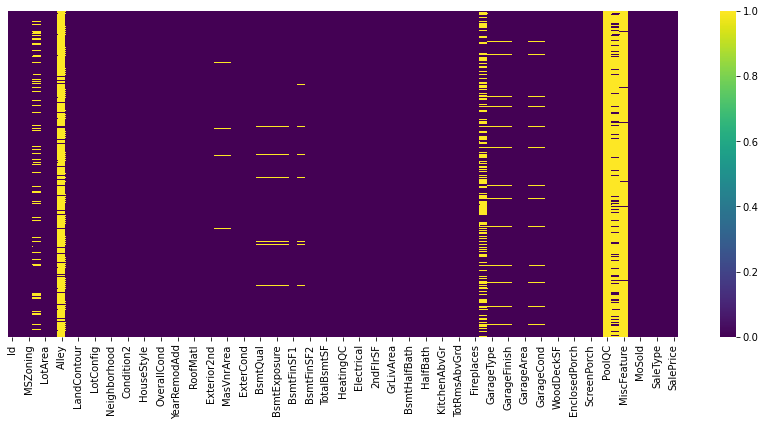

In [7]:
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [8]:
numerical_category = df.select_dtypes(include=np.number)

In [9]:
numerical_category.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [10]:
cols_to_use = ['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond',
                               'YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','SalePrice']

<Figure size 1800x720 with 0 Axes>

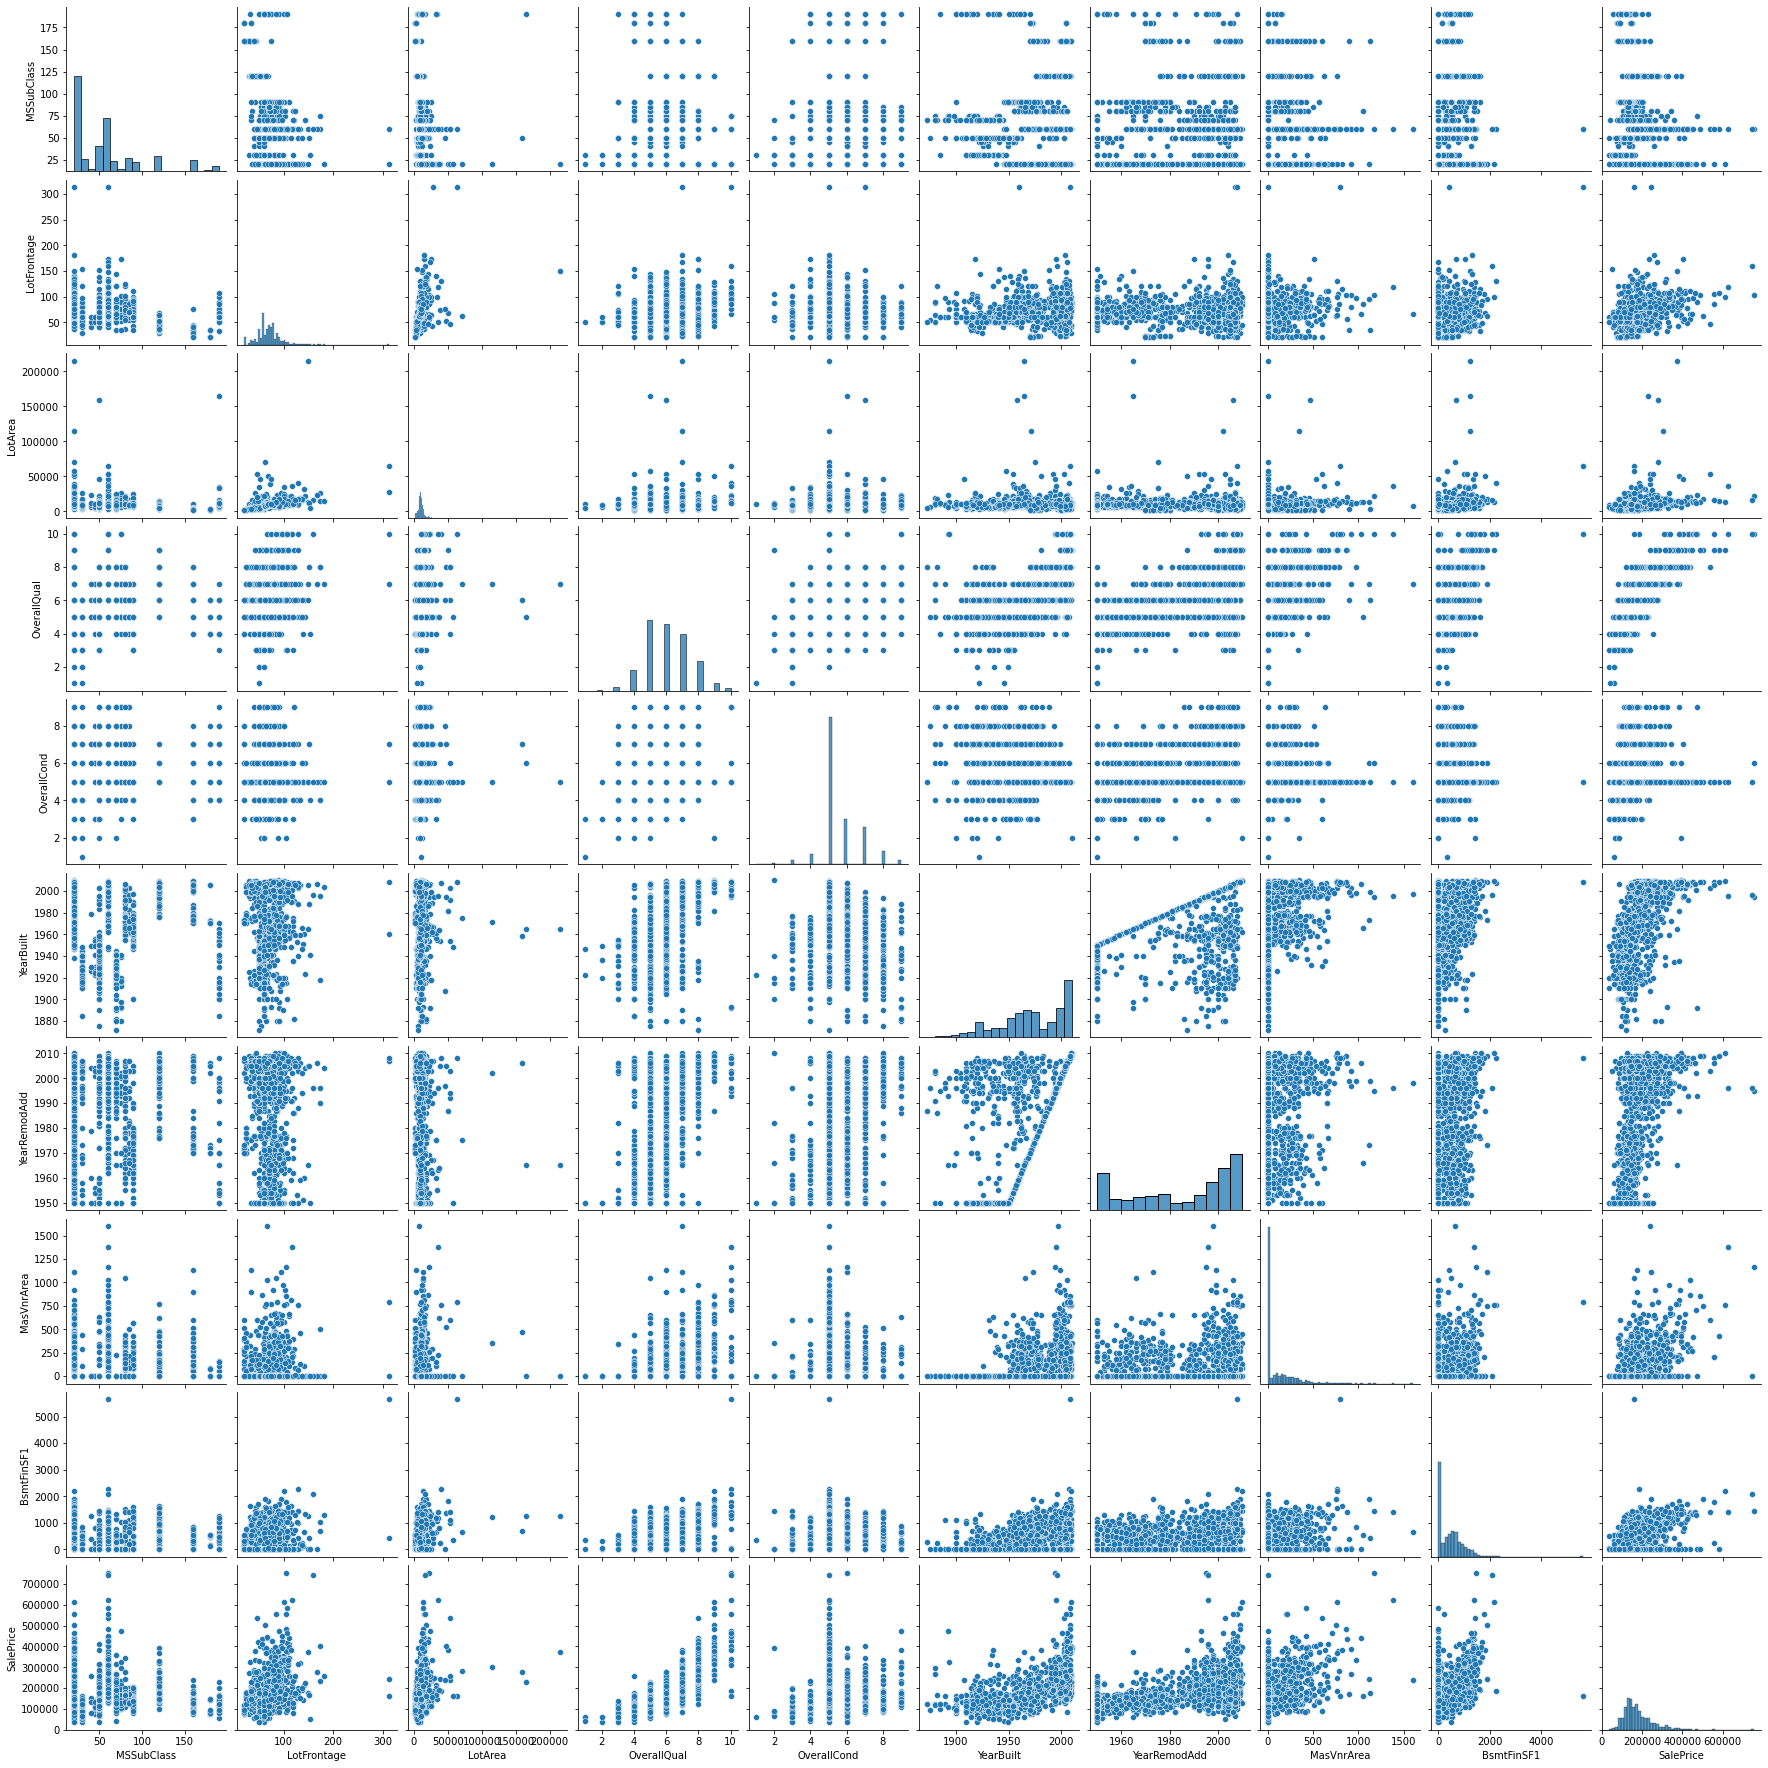

In [11]:
plt.figure(figsize=(25,10))
sns.pairplot(numerical_category[cols_to_use])

In [12]:
cols_to_use2 = ['BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
                               'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','SalePrice']

<Figure size 1800x720 with 0 Axes>

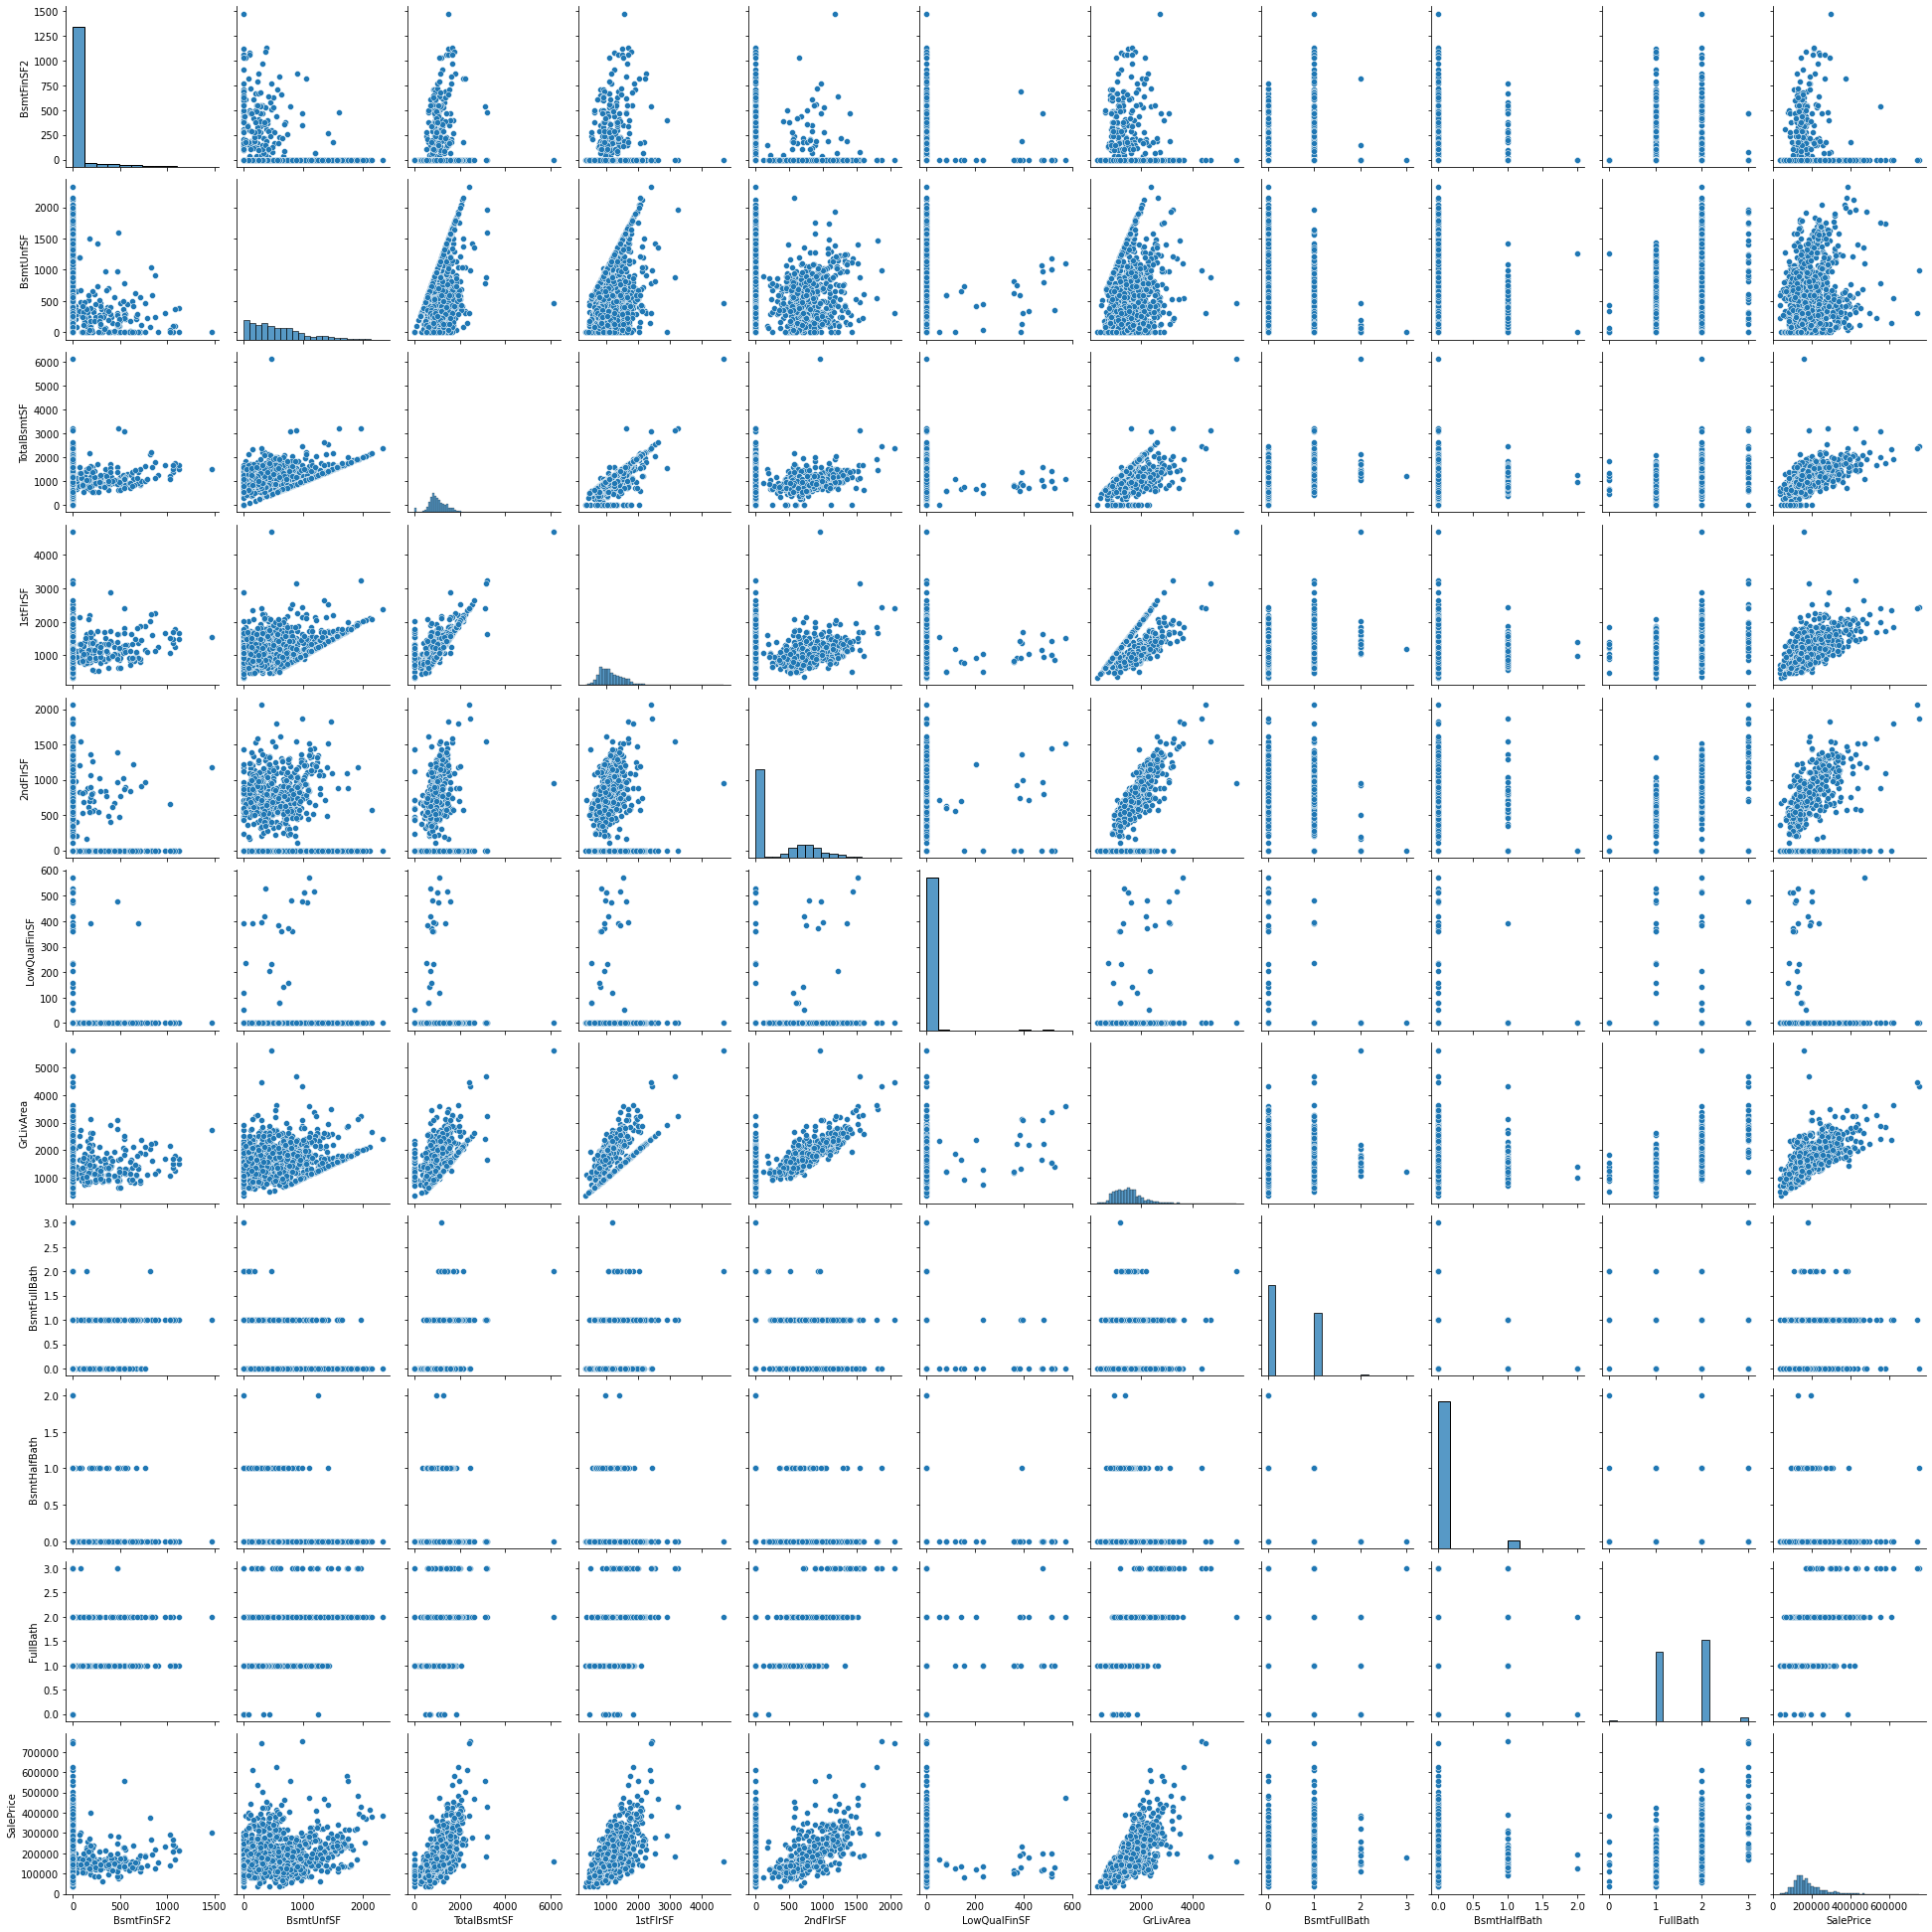

In [13]:
plt.figure(figsize=(25,10))
sns.pairplot(numerical_category[cols_to_use2])

In [14]:
cols_to_use3 = ['HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
                               'GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','SalePrice']

<Figure size 1800x720 with 0 Axes>

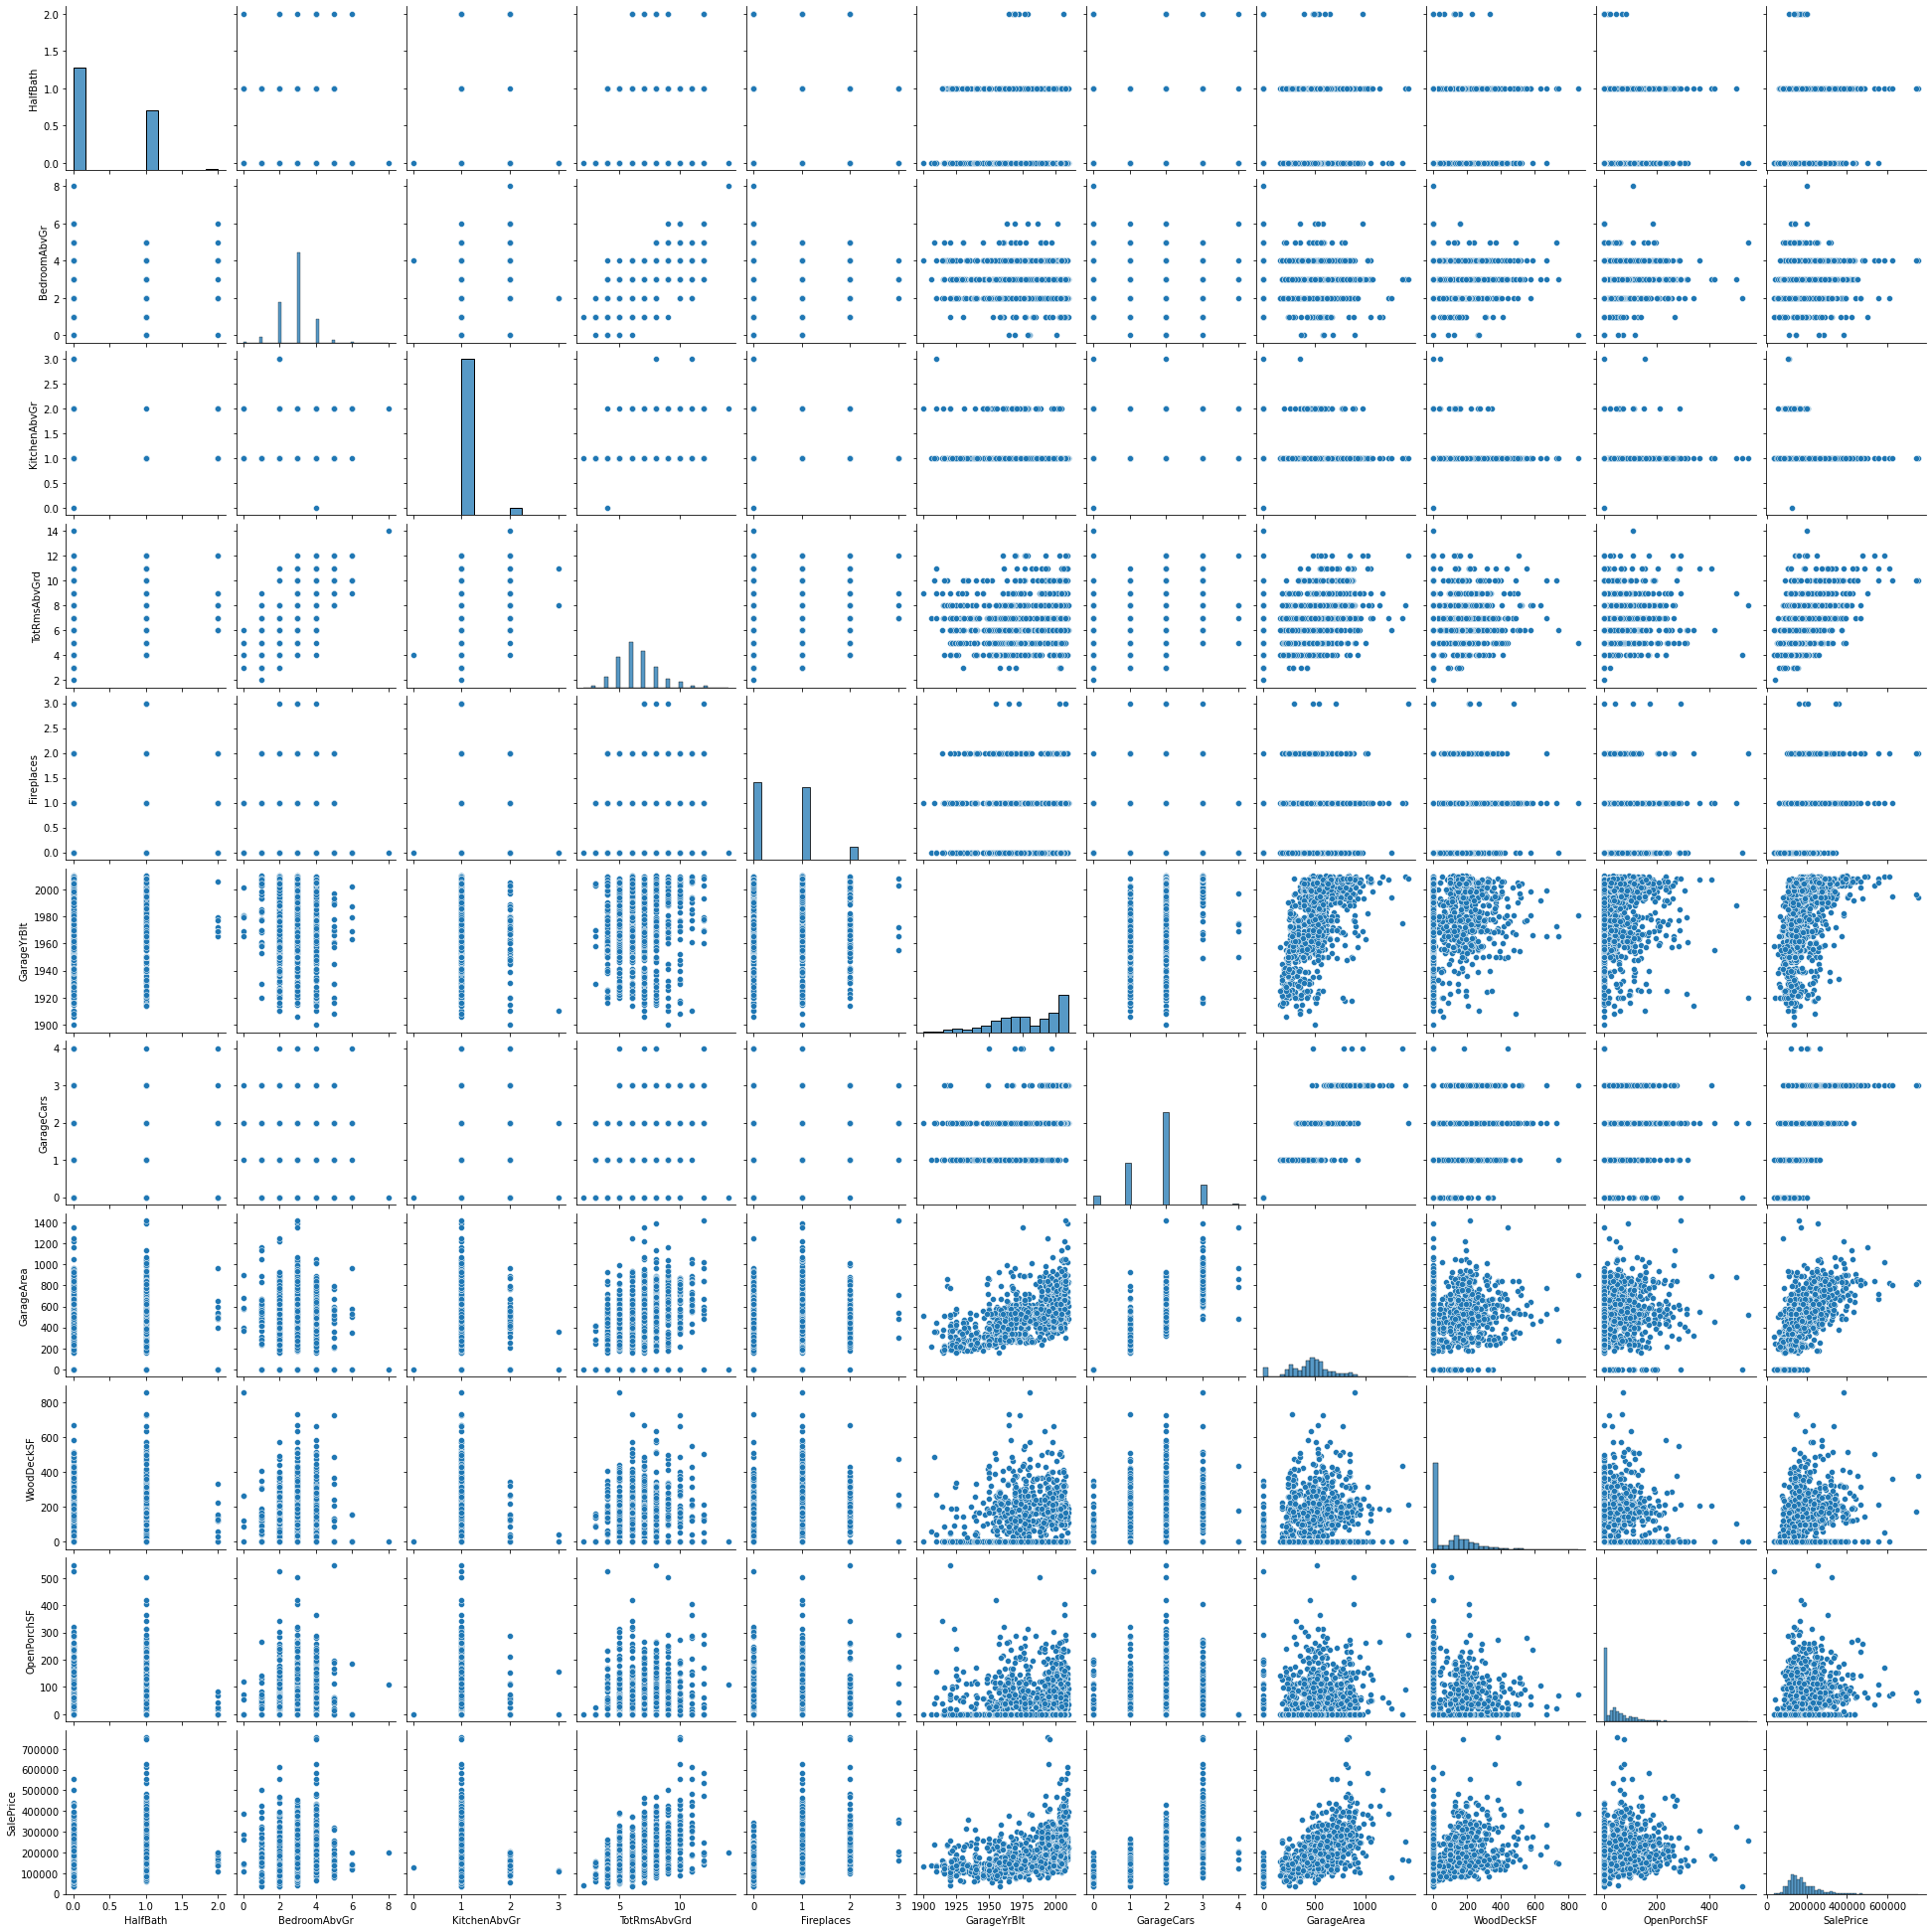

In [15]:
plt.figure(figsize=(25,10))
sns.pairplot(numerical_category[cols_to_use3])

In [16]:
cols_to_use4 = ['EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal',
                               'MoSold','YrSold','SalePrice']

<Figure size 1800x720 with 0 Axes>

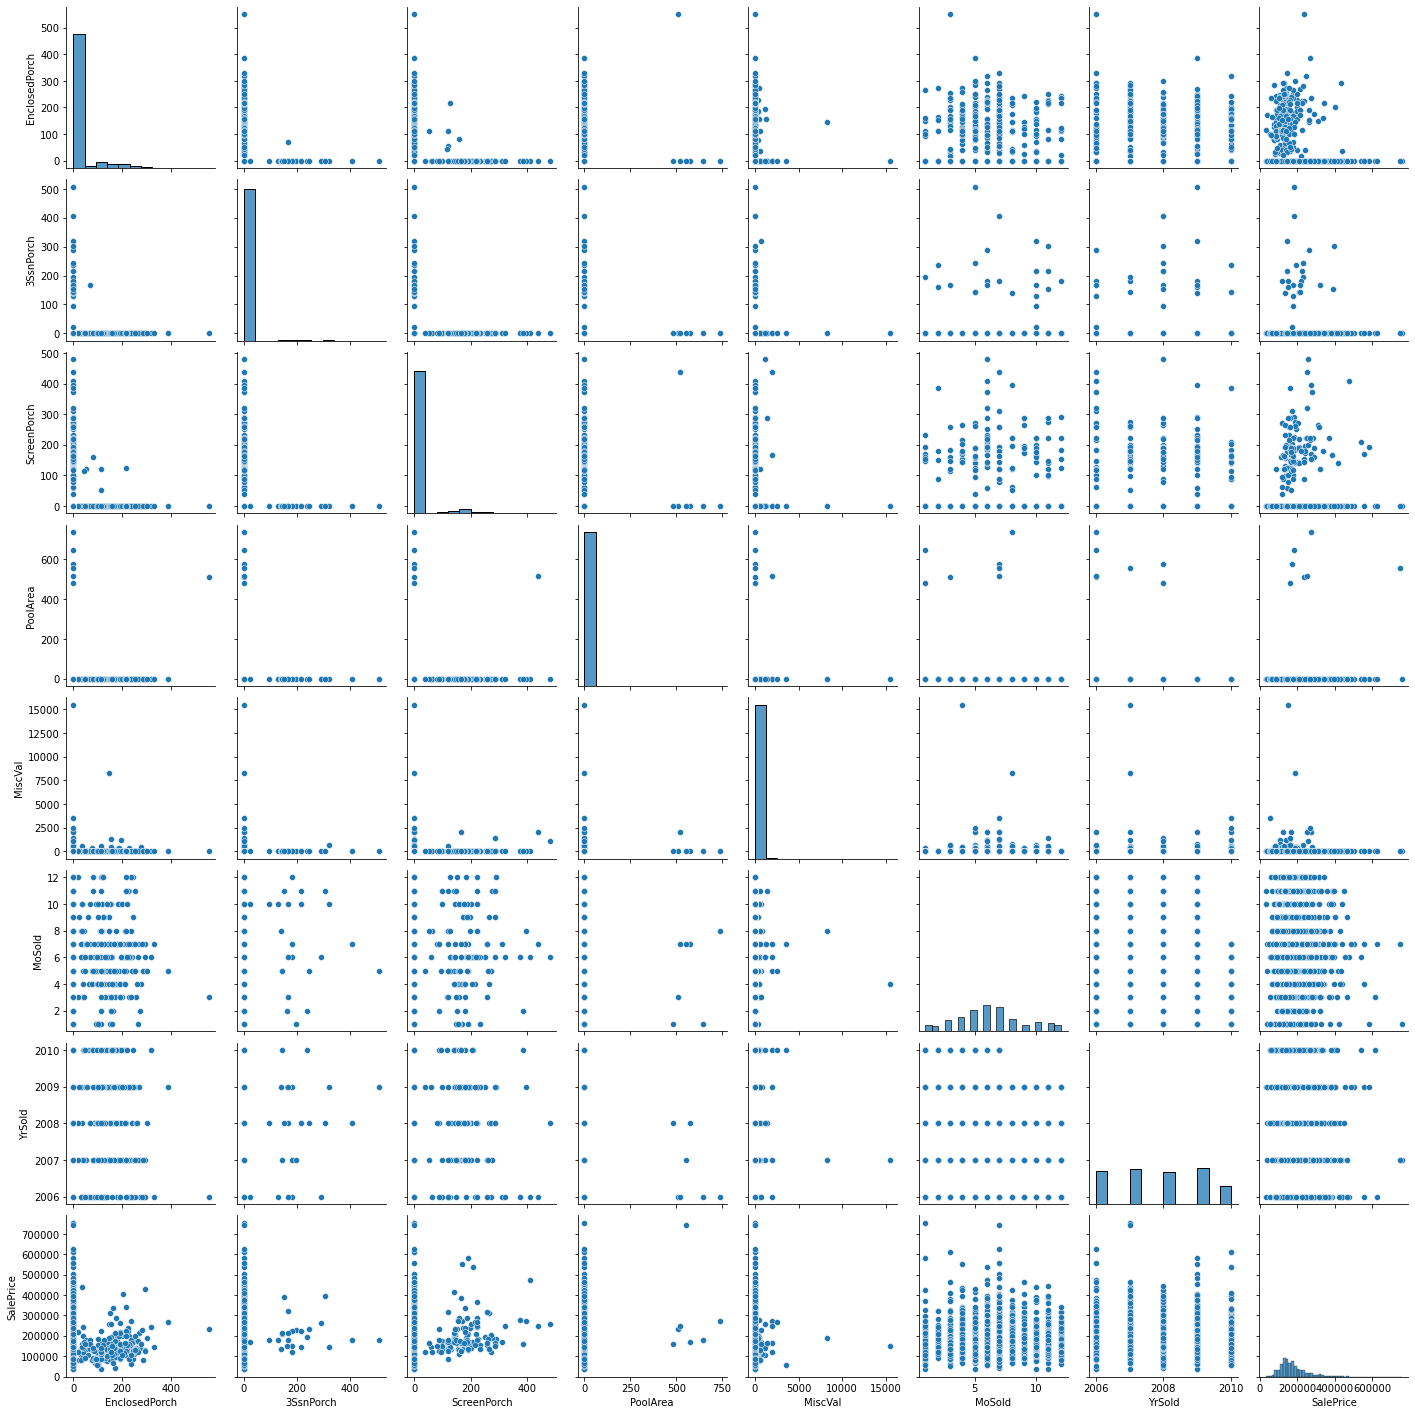

In [17]:
plt.figure(figsize=(25,10))
sns.pairplot(numerical_category[cols_to_use4])

<Figure size 1800x720 with 0 Axes>

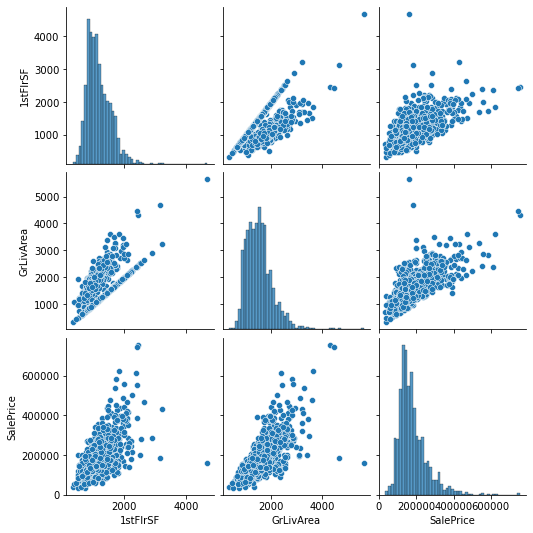

In [18]:
plt.figure(figsize=(25,10))
sns.pairplot(numerical_category[['1stFlrSF','GrLivArea','SalePrice']])

<AxesSubplot:>

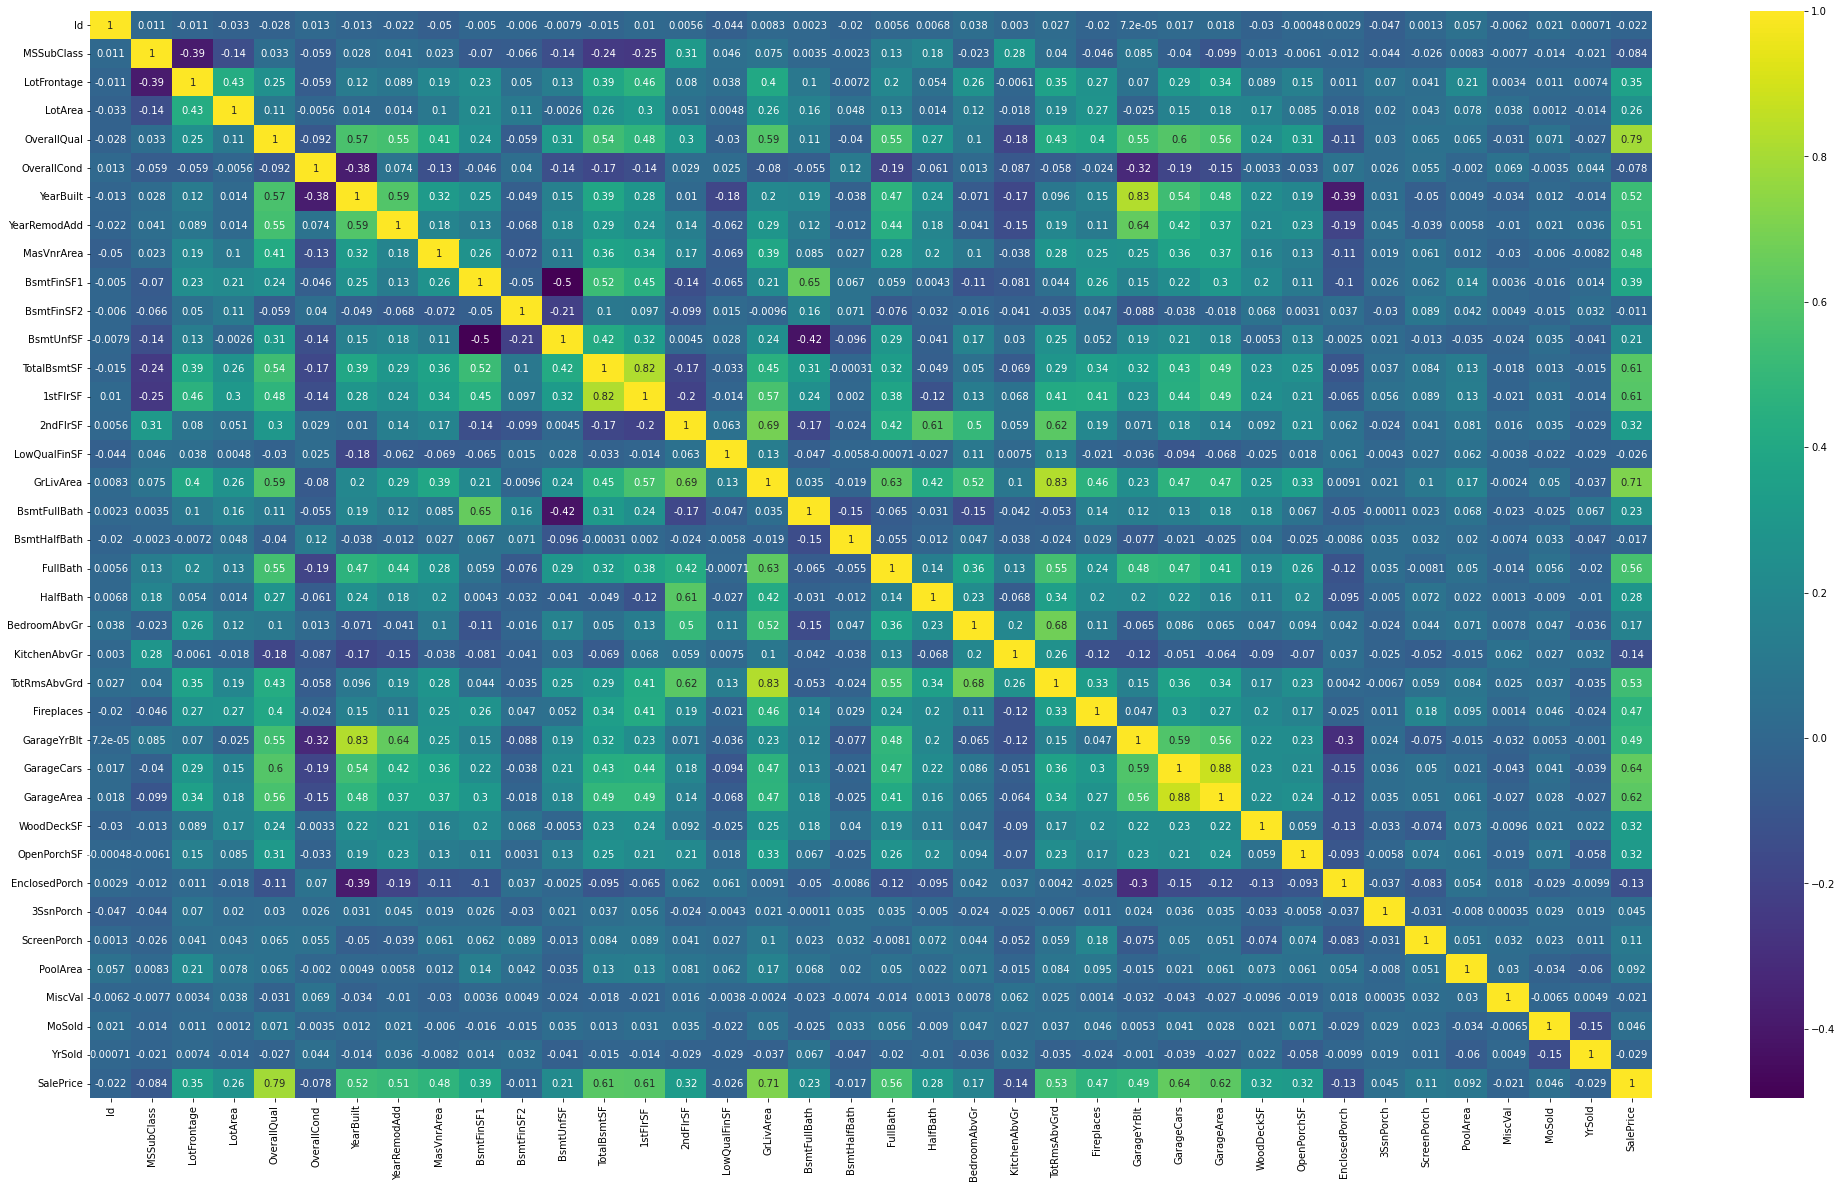

In [19]:
plt.figure(figsize=(35,20))

sns.heatmap(df.corr(),cmap='viridis',annot=True)

<AxesSubplot:ylabel='Frequency'>

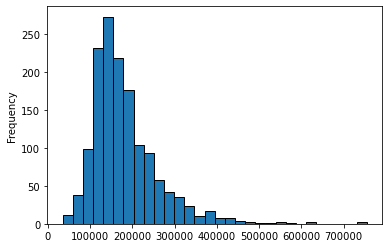

In [20]:
df['SalePrice'].plot.hist(ec='black',bins=30)

In [21]:
df_tmp = df[df['SalePrice']<=500000]

<AxesSubplot:ylabel='Frequency'>

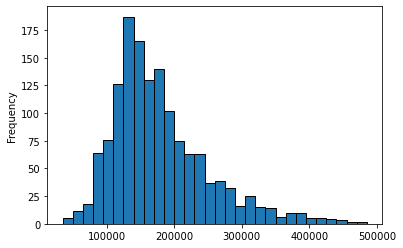

In [22]:
df_tmp['SalePrice'].plot.hist(ec='black',bins=30)

In [23]:
df_tmp['MSZoning'].value_counts()

RL         1142
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [24]:
df_tmp['Street'].value_counts()

Pave    1445
Grvl       6
Name: Street, dtype: int64

In [25]:
df_tmp[df_tmp['Street']=='Pave']['SalePrice'].max()

485000

In [26]:
df_tmp['SalePrice'].max()

485000

In [27]:
df_tmp['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [28]:
df_tmp['LotShape'].value_counts()

Reg    923
IR1    478
IR2     40
IR3     10
Name: LotShape, dtype: int64

### convert string to categories 

One way we can turn all of our data into numbers is by converting them into pandas categories.

We can check the different datatypes compatible with pandas here:
https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html

In [29]:
# Find the columns which contain strings 
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [30]:
# This will turn all of the string value into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

<ipython-input-30-e4a56a1f43d5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp[label] = content.astype("category").cat.as_ordered()


In [31]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1451 non-null   int64   
 1   MSSubClass     1451 non-null   int64   
 2   MSZoning       1451 non-null   category
 3   LotFrontage    1192 non-null   float64 
 4   LotArea        1451 non-null   int64   
 5   Street         1451 non-null   category
 6   Alley          91 non-null     category
 7   LotShape       1451 non-null   category
 8   LandContour    1451 non-null   category
 9   Utilities      1451 non-null   category
 10  LotConfig      1451 non-null   category
 11  LandSlope      1451 non-null   category
 12  Neighborhood   1451 non-null   category
 13  Condition1     1451 non-null   category
 14  Condition2     1451 non-null   category
 15  BldgType       1451 non-null   category
 16  HouseStyle     1451 non-null   category
 17  OverallQual    1451 non-null   in

In [32]:
 df_tmp.Street.cat.categories

Index(['Grvl', 'Pave'], dtype='object')

In [33]:
df_tmp.Street.cat.codes

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Length: 1451, dtype: int8

In [34]:
# Check missing data 
df_tmp.isnull().sum()/len(df_tmp)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.178498
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [35]:
df_tmp[df_tmp.isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Fill missing values 

### Fill numerical missing values first 

In [36]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)



Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


In [37]:
# Check for which numeric columns have null values 
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)


LotFrontage
MasVnrArea
GarageYrBlt


In [38]:
pd.isnull(df_tmp['LotFrontage']).sum()

259

In [39]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing 
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())




            

<ipython-input-39-f15181bbdaae>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp[label+"_is_missing"] = pd.isnull(content)
<ipython-input-39-f15181bbdaae>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp[label] = content.fillna(content.median())


In [40]:
df_tmp['GarageYrBlt'].median()

1979.0

In [41]:
# Check if there's any null numeric values 
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [42]:
# Check to see how many examples were missing 
df_tmp.LotFrontage_is_missing.value_counts()

False    1192
True      259
Name: LotFrontage_is_missing, dtype: int64

### Filling and turning categorical variables into numbers 

In [43]:
# Check for columns which aren't numeric 
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [44]:
# Turn categorical variables into numbers and fill missing 
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df_tmp[label+ "_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes + 1

<ipython-input-44-e2b774ee853c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp[label+ "_is_missing"] = pd.isnull(content)
<ipython-input-44-e2b774ee853c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp[label] = pd.Categorical(content).codes + 1


In [45]:
pd.Categorical(df_tmp['LandContour']).codes +1 

array([4, 4, 4, ..., 4, 4, 4], dtype=int8)

In [46]:
pd.Categorical(df_tmp['Street']).codes+1

array([2, 2, 2, ..., 2, 2, 2], dtype=int8)

In [47]:
df_tmp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageType_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,1,60,4,65.0,8450,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
1,2,20,4,80.0,9600,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
2,3,60,4,68.0,11250,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
3,4,70,4,60.0,9550,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
4,5,60,4,84.0,14260,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False


In [48]:
df_tmp.isnull().sum()

Id                          0
MSSubClass                  0
MSZoning                    0
LotFrontage                 0
LotArea                     0
                           ..
PoolQC_is_missing           0
Fence_is_missing            0
MiscFeature_is_missing      0
SaleType_is_missing         0
SaleCondition_is_missing    0
Length: 127, dtype: int64

Now that all of data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model.

In [49]:
df_tmp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageType_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,1,60,4,65.0,8450,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
1,2,20,4,80.0,9600,2,0,4,4,1,...,False,False,False,False,False,True,True,True,False,False
2,3,60,4,68.0,11250,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
3,4,70,4,60.0,9550,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
4,5,60,4,84.0,14260,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False


In [50]:
%%time
# Instantiate model 
model = RandomForestRegressor(n_jobs=-1, random_state=42)

# Fit the model 
model.fit(df_tmp.drop("SalePrice",axis=1), df_tmp['SalePrice'])

Wall time: 2.36 s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [51]:
# score the model 
model.score(df_tmp.drop("SalePrice",axis=1), df_tmp['SalePrice'])

0.9826404212532845

### Splitting data into train/validation sets 

In [52]:
# Sort DataFrame in date order 
df_tmp.sort_values(by=['YrSold'],inplace=True, ascending=True) 
df_tmp.YrSold.head(20)

<ipython-input-52-763bba4963cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp.sort_values(by=['YrSold'],inplace=True, ascending=True)


781     2006
1220    2006
281     2006
986     2006
569     2006
571     2006
1223    2006
577     2006
976     2006
270     2006
975     2006
266     2006
970     2006
1231    2006
585     2006
262     2006
969     2006
1235    2006
1237    2006
1238    2006
Name: YrSold, dtype: int64

In [53]:
df_tmp['YrSold'].value_counts() 

2009    335
2007    327
2006    312
2008    304
2010    173
Name: YrSold, dtype: int64

In [54]:
# Split data into X and y 
X = df_tmp.drop(['Id','SalePrice'],axis=1)
y = df_tmp['SalePrice']

## Modeling 

In [55]:
# training and testing data
np.random.seed(42) # for reproducibilty 
X_train,X_test,y_train,y_test = train_test_split(X, # the features 
                                                 y, # the target
                                                 test_size=0.3) # the percentage of obs in the test set
                                            

In [56]:
# Put models in a dictionary  
models = {"Linear Regression": LinearRegression(), "Gradient Boosting": GradientBoostingRegressor(),
          "Random Regressor": RandomForestRegressor()}

# create a function to fit and score models 
def fit_and_score(models, X_train,X_test,y_train,y_test):
   
    # set random seed 
    np.random.seed(42)
    # Make a dictionary to keep model scores 
    model_scores = {}
    # Loop through models 
    for name, model in models.items():
        # Fit the model to the data 
        model.fit(X_train,y_train)
        prediction = model.predict(X_test)
        model_scores[name] = np.sqrt(mean_squared_error(y_test,prediction))
    return model_scores

In [57]:
model_scores = fit_and_score(models=models, X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

{'Linear Regression': 25729.58882186497,
 'Gradient Boosting': 21155.881922799326,
 'Random Regressor': 22609.99695041436}

### Hyperparameter tuning with RandomizedSearchCV 

In [58]:
grid_p = {"n_estimators": np.arange(10,395000,50),
      "max_depth": [None,3,5,10,15],
      "min_samples_split": np.arange(2,20,2),
      "min_samples_leaf" : np.arange(1,20,2),
      "max_features": [0.5,1,'sqrt','auto','log2']
       }


In [59]:
# Tune GradientBoostingRegressor 
#%% time 


np.random.seed(42)

# Setup random hyperparametr search for GradientBoostingRegressor 
grid_p = RandomizedSearchCV(estimator=GradientBoostingRegressor(),param_distributions=grid_p,
                           cv=5, n_iter=20,verbose=2)


# Fit random hyperparameter search model for GradientBoostingRegressor
grid_p.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=108910; total time=  59.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=108910; total time=  39.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=108910; total time=  35.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=108910; total time=  32.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=13, min_samples_split=8, n_estimators=108910; total time=  36.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=6, n_estimators=179610; total time= 2.9min
[CV] END max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=6, n_estimators=179610; total time= 3.4min
[CV] END max_depth=10, max_features=auto, min_samples_leaf=15, min_sam

[CV] END max_depth=None, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=32760; total time=  41.9s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=32760; total time=  33.0s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=32760; total time=  32.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=9, min_samples_split=10, n_estimators=321810; total time= 1.5min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=9, min_samples_split=10, n_estimators=321810; total time= 1.6min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=9, min_samples_split=10, n_estimators=321810; total time= 1.6min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=9, min_samples_split=10, n_estimators=321810; total time= 1.4min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=9, min_samples_split=10, n_estimators=321810; total time= 1.4min
[CV] END

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 15],
                                        'max_features': [0.5, 1, 'sqrt', 'auto',
                                                         'log2'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([    10,     60,    110, ..., 394860, 394910, 394960])},
                   verbose=2)

In [60]:
grid_p.best_params_ 

{'n_estimators': 225260,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 3}

In [61]:
yg_pred = grid_p.predict(X_test)

In [62]:
print(np.sqrt(mean_squared_error(y_test,yg_pred)))

20586.085115513135


In [63]:
%%time 

# Change max_samples value 


# Different RandomForestRegressor hyperparameters 
rf_grid = {"n_estimators": np.arange(10,85000,50),
      "max_depth": [None,3,5,10],
      "min_samples_split": np.arange(2,24,2),
      "min_samples_leaf" : np.arange(1,24,2),
      "max_features": [0.5,1,'sqrt','auto','log2']
}





#model = RandomForestRegressor(n_jobs = -1,random_state = 42)
# Instantiate RandomizedSearchCV model 

rs_model = RandomizedSearchCV(estimator=RandomForestRegressor(n_jobs=-1),
                            param_distributions=rf_grid,
                            n_iter=20,
                            cv=5,
                            verbose=True)

# Fit the RandomizedSearchCV model 
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Wall time: 2h 46min 14s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt', 'auto',
                                                         'log2'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22]),
                                        'n_estimators': array([   10,    60,   110, ..., 84860, 84910, 84960])},
                   verbose=True)

In [64]:
rs_model.best_params_ 

{'n_estimators': 54460,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None}

In [65]:
rs_pred = rs_model.predict(X_test)

In [66]:
print(np.sqrt(mean_squared_error(y_test,rs_pred))) 

24550.985535007316


## Hyperparameter Tuning with GridSearchCV

since our GradientBoostingClassifier model provides the best scores so far, 
we'll try and improve them agian using GridSearchCV...

In [138]:
# Different hyperparameters for our LogisticRegression model 
bc_grid = {'n_estimators': [3360],
 'min_samples_split': [12],
 'min_samples_leaf': [3],
 'max_features': [0.5,1],
 'max_depth': [3]}
       
grid_2 = {'n_estimators': [10, 100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

# Setup grid hyperparameter search for LogisticRegression 
gb_gd = GridSearchCV(GradientBoostingRegressor(),param_grid=bc_grid,cv=5,verbose=True)


# Fit grid hyperparameter search model 
gb_gd.fit(X_train,y_train);


Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [139]:
gb_gd.best_params_ 

{'max_depth': 3,
 'max_features': 0.5,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 3360}

In [ ]:
23710/60

In [140]:
gs_pred = gb_gd.predict(X_test)

In [141]:
print(np.sqrt(mean_squared_error(y_test,gs_pred)))

21063.977774865


### Train a model with the best hyperparameters 

**Note:** These were found after 100 iterations of RandomizedSearchCV 

In [109]:
%%time 


# Most ideal hyperparameters 
ideal_model = GradientBoostingRegressor(n_estimators=23710, 
                                    min_samples_leaf=1,
                                    min_samples_split=18,
                                    max_features=0.5,
                                    max_depth=3,
                                    random_state=42) # random state so our results are reproducible 

# Fit the ideal model 
ideal_model.fit(X_train,y_train)

Wall time: 1min 47s


GradientBoostingRegressor(max_features=0.5, min_samples_split=18,
                          n_estimators=23710, random_state=42)

In [110]:
ideal_y = ideal_model.predict(X_test)

In [111]:
print(np.sqrt(mean_squared_error(y_test,ideal_y)))

20535.1813280853


In [112]:
import pickle 

# save an existing model to file 
pickle.dump(ideal_model,open("gs_gradient_boost_model_2.pk1","wb"))



In [113]:
# Load a saved model 
loaded_pickle_model = pickle.load(open("gs_gradient_boost_model_2.pk1",'rb'))

## Make predictions on test data 

In [114]:
# Import the test data 
test_df = pd.read_csv('test.csv')

test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [115]:
# This will turn all of the string value into category values
for label, content in test_df.items():
    if pd.api.types.is_string_dtype(content):
        test_df[label] = content.astype("category").cat.as_ordered()

In [116]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1459 non-null   int64   
 1   MSSubClass     1459 non-null   int64   
 2   MSZoning       1455 non-null   category
 3   LotFrontage    1232 non-null   float64 
 4   LotArea        1459 non-null   int64   
 5   Street         1459 non-null   category
 6   Alley          107 non-null    category
 7   LotShape       1459 non-null   category
 8   LandContour    1459 non-null   category
 9   Utilities      1457 non-null   category
 10  LotConfig      1459 non-null   category
 11  LandSlope      1459 non-null   category
 12  Neighborhood   1459 non-null   category
 13  Condition1     1459 non-null   category
 14  Condition2     1459 non-null   category
 15  BldgType       1459 non-null   category
 16  HouseStyle     1459 non-null   category
 17  OverallQual    1459 non-null   in

### Filling Missing Values 

#### Filling numerical values first 

In [117]:
# Check for which numeric columns have null values 
for label, content in test_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)


LotFrontage
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
GarageYrBlt
GarageCars
GarageArea


In [118]:
test_df['LotFrontage'].isnull().sum()

227

In [119]:
for label,content in test_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing 
            test_df[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            test_df[label] = content.fillna(content.median())




            

In [120]:
# Check if there's any null numeric values 
for label, content in test_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [121]:
# Check to see how many examples were missing 
test_df.LotFrontage_is_missing.value_counts()

False    1232
True      227
Name: LotFrontage_is_missing, dtype: int64

### Filling and turning categorical variables into numbers 

In [122]:
# Check for columns which aren't numeric 
for label, content in test_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [123]:
# Turn categorical variables into numbers and fill missing 
for label, content in test_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        test_df[label+ "_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        test_df[label] = pd.Categorical(content).codes+1

In [124]:
test_df[['Alley','Alley_is_missing']]

,Alley,Alley_is_missing
0,0,True
1,0,True
2,0,True
3,0,True
4,0,True
...,...,...
1454,0,True
1455,0,True
1456,0,True
1457,0,True


In [125]:
df_test = test_df[test_df.columns.intersection(X.columns)]


In [126]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,GarageType_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,20,3,80.0,11622,2,0,4,4,1,5,...,False,False,False,False,False,True,False,True,False,False
1,20,4,81.0,14267,2,0,1,4,1,1,...,False,False,False,False,False,True,True,False,False,False
2,60,4,74.0,13830,2,0,1,4,1,5,...,False,False,False,False,False,True,False,True,False,False
3,60,4,78.0,9978,2,0,1,4,1,5,...,False,False,False,False,False,True,True,True,False,False
4,120,4,43.0,5005,2,0,1,2,1,5,...,False,False,False,False,False,True,True,True,False,False


In [127]:
pickle_y_preds = loaded_pickle_model.predict(df_test)

In [128]:
Id = test_df['Id']

In [129]:
df_preds = pd.DataFrame(pickle_y_preds,columns=['SalePrice'],index=[Id])

In [130]:
df_preds

,SalePrice
Id,
1461,112582.716796
1462,168461.320690
1463,192279.935185
1464,187415.093462
1465,204898.479482
...,...
2915,77747.734492
2916,74665.946947
2917,158156.594577


In [131]:
df_preds.to_csv('Submission8.csv')

In [132]:
# Export predictions data 
df_preds.to_csv("test_predictions.csv",index=False) 

### Feature Importance 

Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the **target varibale** (SalePrice)

In [133]:
# Find feature importance of our best model 
len(ideal_model.feature_importances_)

125

In [134]:
X_train.shape

(1015, 125)

In [135]:
# Helper function for plotting feature importance 
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features":columns,"feature_importances":importances})
          .sort_values("feature_importances",ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe 
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

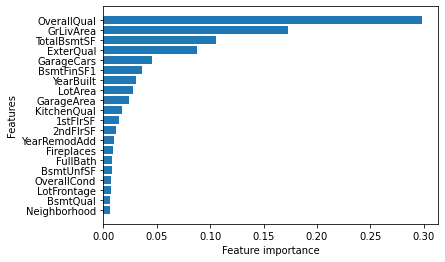

In [136]:
plot_features(X_train.columns, ideal_model.feature_importances_)